**Load the Data to Google Colab from Github**

In [ ]:
# Clone the GitHub repository
!git clone https://github.com/HWhr3000/F21DL_Coursework_grp2.git

# Access the train and validation folders
!ls F21DL_Coursework_grp2/data/train
!ls F21DL_Coursework_grp2/data/validation

Cloning into 'F21DL_Coursework_grp2'...
remote: Enumerating objects: 34544, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 34544 (delta 17), reused 27 (delta 13), pack-reused 34506 (from 1)
Receiving objects: 100% (34544/34544), 172.18 MiB | 16.10 MiB/s, done.
Resolving deltas: 100% (282/282), done.
Updating files: 100% (36001/36001), done.
angry  disgust	fear  happy  neutral  sad  surprise
angry  disgust	fear  happy  neutral  sad  surprise


**Import the necessary libraries**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import cv2  # OpenCV Python library for computer vision
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

**Paths to the Data**

In [ ]:
train_data_dir = 'F21DL_Coursework_grp2/data/train'
validation_data_dir = 'F21DL_Coursework_grp2/data/validation'

In [ ]:
import os
import numpy as np
import cv2

def load_and_preprocess_images(data_dir):
    """
    Loads images from subfolders, preprocesses them, and creates labels.

    Args:
        data_dir: Path to the directory containing subfolders for each emotion.

    Returns:
        images: NumPy array of preprocessed images.
        labels: NumPy array of corresponding labels.
    """
    images = []
    labels = []

    # Define a mapping between emotion folder names and numerical labels
    emotion_mapping = {
        'angry': 0,
        'disgust': 1,
        'fear': 2,
        'happy': 3,
        'neutral': 4,
        'sad': 5,
        'surprise': 6
    }

    # Iterate through subfolders (emotions)
    for emotion_folder in os.listdir(data_dir):
        emotion_path = os.path.join(data_dir, emotion_folder)

        # Check if it's a directory
        if os.path.isdir(emotion_path):
            # Iterate through images in the subfolder
            for filename in os.listdir(emotion_path):
                if filename.endswith(('.jpg', '.jpeg', '.png')): # Check image file extensions
                    image_path = os.path.join(emotion_path, filename)

                    # Load the image
                    img = cv2.imread(image_path)

                    # Preprocess the image (e.g., resize, convert to grayscale)
                    img = cv2.resize(img, (48, 48))  # Adjust size as needed
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # Add the image and label to the lists
                    images.append(img)
                    labels.append(emotion_mapping[emotion_folder])

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Call the function to load and preprocess your data
train_images, train_labels = load_and_preprocess_images(train_data_dir)
validation_images, validation_labels = load_and_preprocess_images(validation_data_dir)

# Print some information about the loaded data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)

Train images shape: (28821, 48, 48)
Train labels shape: (28821,)
Validation images shape: (7066, 48, 48)
Validation labels shape: (7066,)


In [ ]:
X_train = train_images  # Assign your training images to X_train
y_train = train_labels  # Assign your training labels to y_train

X_val = validation_images  # Assign your validation images to X_val
y_val = validation_labels  # Assign your validation labels to y_val

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (28821, 48, 48)
y_train shape: (28821,)
X_val shape: (7066, 48, 48)
y_val shape: (7066,)


array([[162, 165, 184, ..., 149, 126,  79],
       [145, 167, 181, ..., 150, 126,  79],
       [144, 171, 177, ..., 152, 136,  89],
       ...,
       [119, 111,  99, ...,  84, 130, 129],
       [122, 111, 106, ...,   4,  88, 127],
       [142, 117, 107, ...,   1,  20, 116]], dtype=uint8)
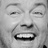

In [ ]:
X_train[0]

In [ ]:
y_train[0]

6

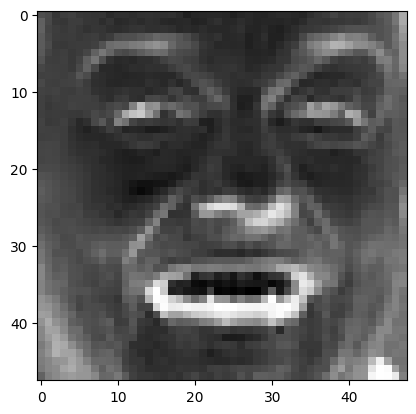

In [ ]:
some_image = X_train[0]
some_expression_image = some_image.reshape(48, 48)
plt.imshow(some_expression_image, cmap=mpl.cm.binary)
plt.show()

In [ ]:
def plot_face(data):
    image = data.reshape(48, 48)  # Reshape to the original image dimensions
    plt.imshow(image, cmap='gray', interpolation="nearest")  # Use 'gray' colormap
    plt.axis("off")

In [ ]:
def plot_faces(instances, images_per_row=10, **options):
    size = 48  # Adjust size to your image dimensions
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='gray', **options)  # Use 'gray' colormap
    plt.axis("off")

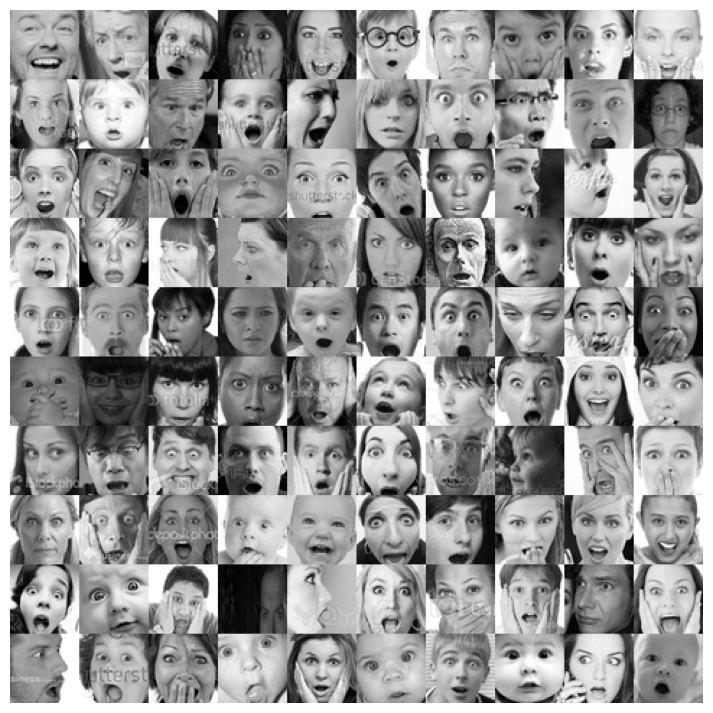

In [ ]:
plt.figure(figsize=(9, 9))
example_images = X_train[:100]  # Select the first 100 images from X_train
plot_faces(example_images, images_per_row=10)
plt.show()

# **Normalise the data**

Apply Stratification

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

Check the distribution

In [ ]:
# Define emotion_mapping outside the function
emotion_mapping = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Get unique classes and their counts in the training set
unique_train_classes, train_class_counts = np.unique(y_train, return_counts=True)

# Get unique classes and their counts in the testing set
unique_test_classes, test_class_counts = np.unique(y_test, return_counts=True)

# Define a mapping from numerical labels to emotion names (reverse of emotion_mapping)
reverse_emotion_mapping = {v: k for k, v in emotion_mapping.items()}

# Print the class distribution for the training set
print("Training Set Class Distribution:")
for class_label, count in zip(unique_train_classes, train_class_counts):
    emotion_name = reverse_emotion_mapping[class_label]  # Get emotion name
    print(f"Emotion {emotion_name}: {count} samples")

# Print the class distribution for the testing set
print("\nTesting Set Class Distribution:")
for class_label, count in zip(unique_test_classes, test_class_counts):
    emotion_name = reverse_emotion_mapping[class_label]  # Get emotion name
    print(f"Emotion {emotion_name}: {count} samples")

Training Set Class Distribution:
Emotion angry: 3194 samples
Emotion disgust: 349 samples
Emotion fear: 3282 samples
Emotion happy: 5731 samples
Emotion neutral: 3986 samples
Emotion sad: 3950 samples
Emotion surprise: 2564 samples

Testing Set Class Distribution:
Emotion angry: 799 samples
Emotion disgust: 87 samples
Emotion fear: 821 samples
Emotion happy: 1433 samples
Emotion neutral: 996 samples
Emotion sad: 988 samples
Emotion surprise: 641 samples


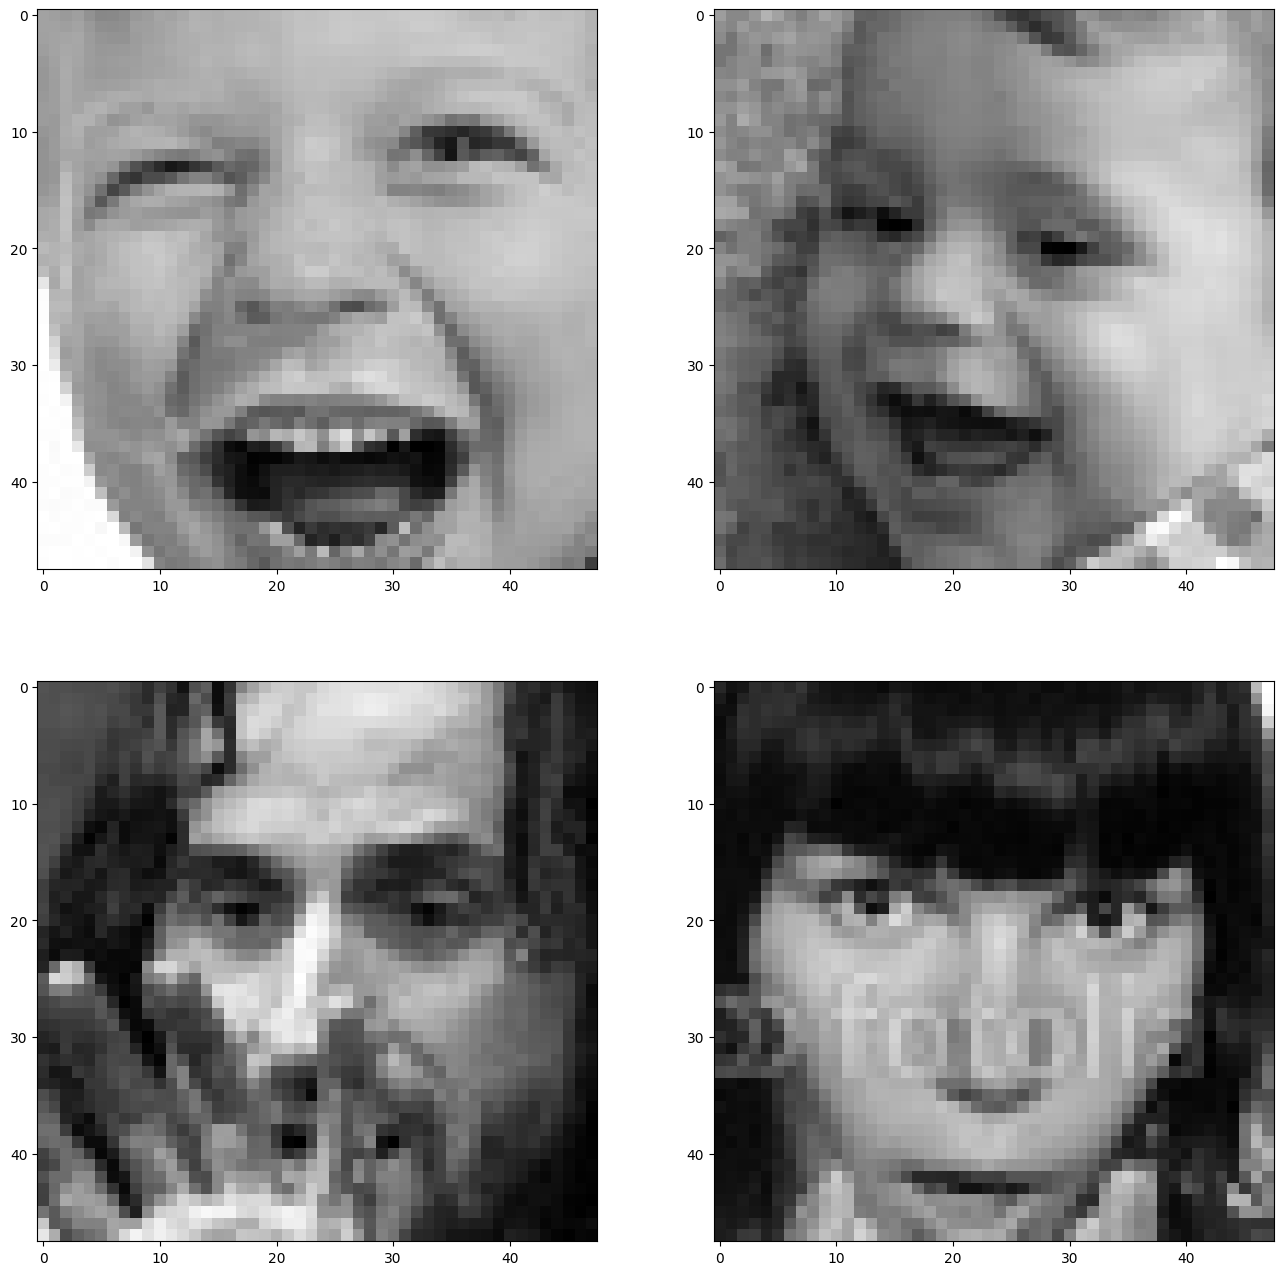

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 16))

axarr[0, 0].imshow(X_train[1].reshape(48, 48), cmap='gray')
axarr[0, 1].imshow(X_train[10].reshape(48, 48), cmap='gray')
axarr[1, 0].imshow(X_train[100].reshape(48, 48), cmap='gray')
axarr[1, 1].imshow(X_train[1000].reshape(48, 48), cmap='gray')

plt.show()

In [ ]:
print(y_train[1])
print(y_train[10])
print(y_train[100])
print(y_train[1000])

3
3
5
6


# **Feature Reduction by Downsampling**

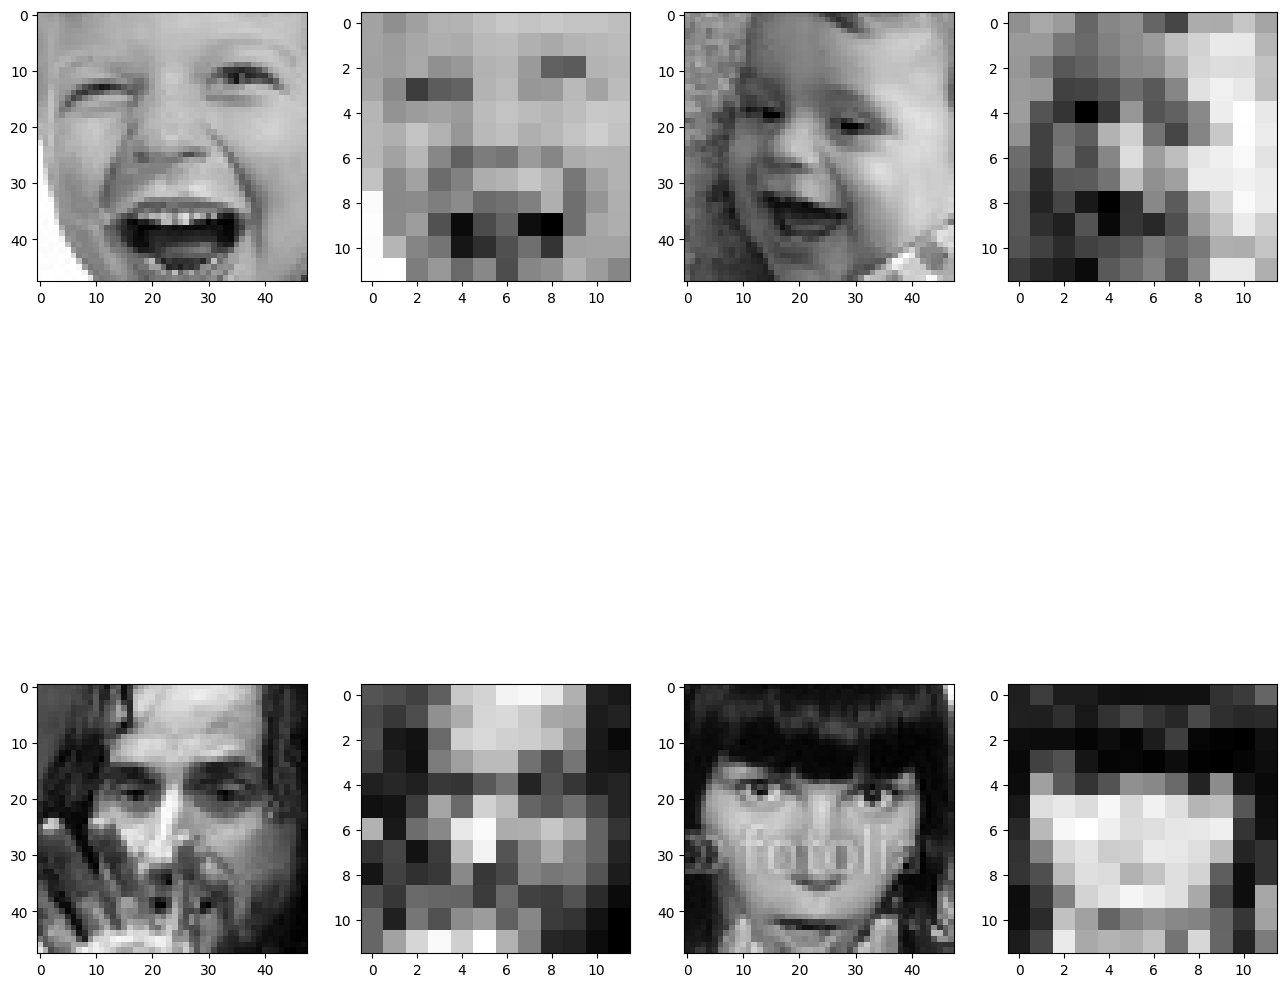

In [ ]:
fig, axarr = plt.subplots(2, 4, figsize=(16, 16))

# Original and Downsampled Images
image_indices = [1, 10, 100, 1000]  # Indices of images to display

for i, index in enumerate(image_indices):
    row = i // 2
    col = i % 2 * 2

    original_image = X_train[index].reshape(48, 48)  # Reshape to original dimensions
    downsampled_image = cv2.resize(original_image, dsize=(12, 12))  # Downsample to 24x24

    axarr[row, col].imshow(original_image, cmap='gray')
    axarr[row, col + 1].imshow(downsampled_image, cmap='gray')


plt.show()

# **Apply resize to all the dataset**

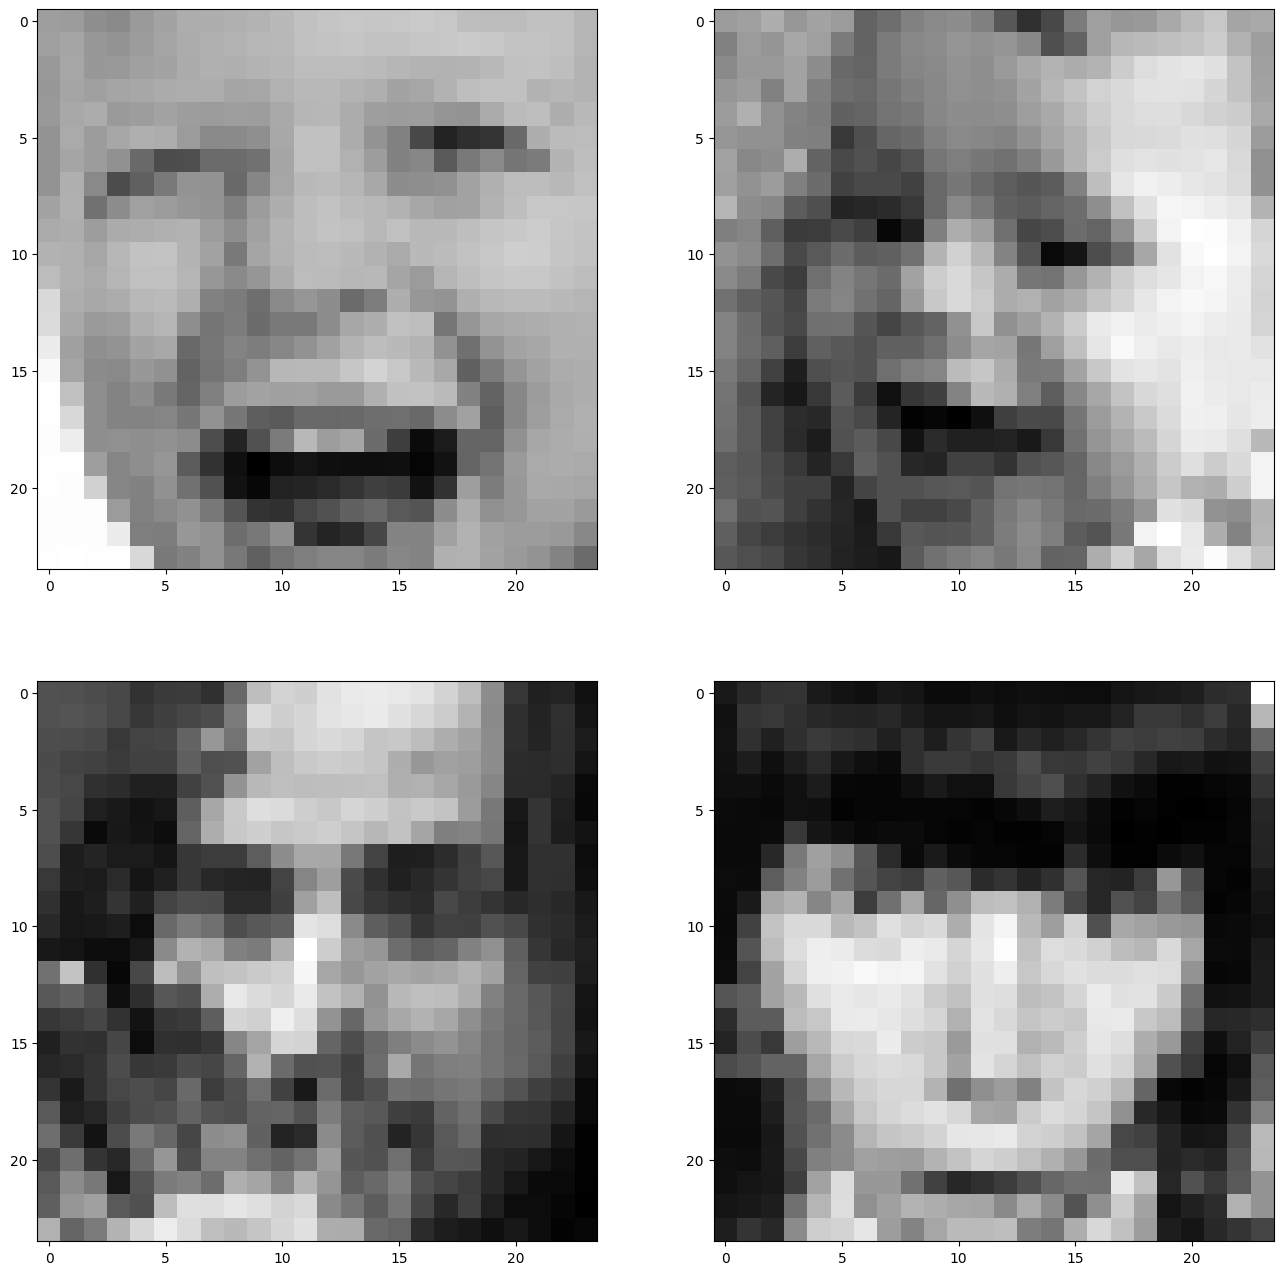

In [ ]:
# Assuming X_train has shape (num_samples, 2304)
num_samples_train = X_train.shape[0]
X_train_images = X_train.reshape(num_samples_train, 48, 48)  # Reshape to (num_samples, 48, 48)

# Assuming X_test has shape (num_samples, 2304)
num_samples_test = X_test.shape[0]
X_test_images = X_test.reshape(num_samples_test, 48, 48)  # Reshape to (num_samples, 48, 48)

# Now you can resize the images using a list comprehension
X_train_sm = [cv2.resize(img, dsize=(24, 24)).flatten() for img in X_train_images]
X_train_sm = np.array(X_train_sm)  # Convert back to NumPy array

X_test_sm = [cv2.resize(img, dsize=(24, 24)).flatten() for img in X_test_images]
X_test_sm = np.array(X_test_sm)  # Convert back to NumPy array

# Display a few resized images
fig, axarr = plt.subplots(2, 2, figsize=(16, 16))
axarr[0, 0].imshow(X_train_sm[1].reshape(24, 24), cmap='gray')
axarr[0, 1].imshow(X_train_sm[10].reshape(24, 24), cmap='gray')
axarr[1, 0].imshow(X_train_sm[100].reshape(24, 24), cmap='gray')
axarr[1, 1].imshow(X_train_sm[1000].reshape(24, 24), cmap='gray')

plt.show()

# **Training and Evaluation of a Binary Classifier**

In [ ]:
# Assuming 'y' contains emotion labels (e.g., 0 for not happy, 1 for happy)

# Create binary labels for happy vs. not happy
y_train_happy = (y_train == 3)  # True for happy, False for not happy
y_test_happy = (y_test == 3)

# **Stochastic Gradient Descent (SGD)**

In [ ]:
from sklearn.linear_model import SGDClassifier

# Create an SGDClassifier instance
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Fit the classifier to your training data (happy vs. not happy) using the resized and flattened images
sgd_clf.fit(X_train_sm, y_train_happy) # Use X_train_sm instead of X_train

SGDClassifier(random_state=42)

In [ ]:
# Print a slice of y_test_happy (happy vs. not happy labels)
print(y_test_happy[50:60])

# Print the corresponding slice of y_test (original emotion labels)
print(y_test[50:60])


[False False False  True  True  True  True  True  True  True]
[5 4 5 3 3 3 3 3 3 3]


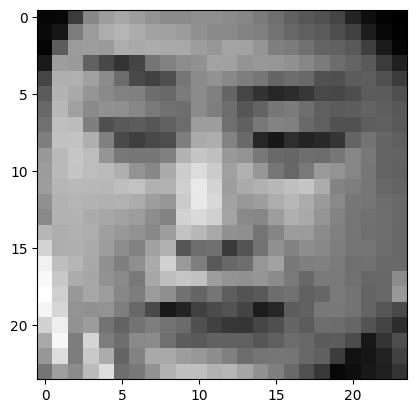

The classifier predicts this image does not represent a happy emotion.


In [ ]:
# Pick an image from your test set (e.g., index 50)
some_image = X_test_sm[50]

# Reshape it to the original image dimensions (24, 24) for display
some_image_reshaped = some_image.reshape(24, 24)

# Display the image
plt.imshow(some_image_reshaped, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.show()

# Predict the emotion for this image
prediction = sgd_clf.predict([some_image])

# Interpret the prediction
if prediction[0]:
    print("The classifier predicts this image represents a happy emotion.")
else:
    print("The classifier predicts this image does not represent a happy emotion.")

# **Performance Measures**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 3 folds
cross_val_scores = cross_val_score(sgd_clf, X_train_sm, y_train_happy, cv=3, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print the average accuracy
average_accuracy = cross_val_scores.mean()
print("Average accuracy:", average_accuracy)

Cross-validation scores: [0.74954463 0.752635   0.74860117]
Average accuracy: 0.7502602669864847


Using a NeverHappyClassifier Class

In [ ]:
from sklearn.base import BaseEstimator

class NeverHappyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass  # This classifier does not need to learn anything

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)  # Always predict False (not happy)

# Create an instance of the classifier
never_happy_clf = NeverHappyClassifier()

# Evaluate its accuracy using cross-validation
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(never_happy_clf, X_train_sm, y_train_happy, cv=3, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation scores for NeverHappyClassifier:", cross_val_scores)

# Calculate and print the average accuracy
average_accuracy = cross_val_scores.mean()
print("Average accuracy for NeverHappyClassifier:", average_accuracy)

Cross-validation scores for NeverHappyClassifier: [0.75904241 0.74365647 0.75159401]
Average accuracy for NeverHappyClassifier: 0.7514309675812284


#Alternative solution with scikit-learn 'DummyClassifier' class

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

# Create a DummyClassifier with the "most_frequent" strategy
# This will always predict the most frequent class in the training data (likely "not happy")
never_happy_dummy = DummyClassifier(strategy="most_frequent")

# Evaluate its accuracy using cross-validation
cross_val_scores = cross_val_score(never_happy_dummy, X_train_sm, y_train_happy, cv=3, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation scores for DummyClassifier (Never Happy):", cross_val_scores)

# Calculate and print the average accuracy
average_accuracy = cross_val_scores.mean()
print("Average accuracy for DummyClassifier (Never Happy):", average_accuracy)

Cross-validation scores for DummyClassifier (Never Happy): [0.75136612 0.75146389 0.75146389]
Average accuracy for DummyClassifier (Never Happy): 0.7514313005369674


This baseline accuracy indicates that simply predicting the majority class ("not happy") would be correct about 75.14% of the time. This serves as a benchmark for evaluating the performance of more complex models. Any model that performs significantly better than this baseline demonstrates that it has learned useful patterns from the data and is making more informed predictions than simply guessing the majority class.|

# **Confusion Matrix**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Get predictions using cross-validation
y_train_pred = cross_val_predict(sgd_clf, X_train_sm, y_train_happy, cv=3)

# Create the confusion matrix
cm = confusion_matrix(y_train_happy, y_train_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[15887  1438]
 [ 4320  1411]]


**True Negatives (TN):** 15887 - The model correctly classified 15887 images as "not happy."
**False Positives (FP):** 1438 - The model incorrectly classified 1438 images as "happy" when they were actually "not happy."
**False Negatives (FN):** 4320 - The model incorrectly classified 4320 images as "not happy" when they were actually "happy."
**True Positives (TP):** 1411 - The model correctly classified 1411 images as "happy."

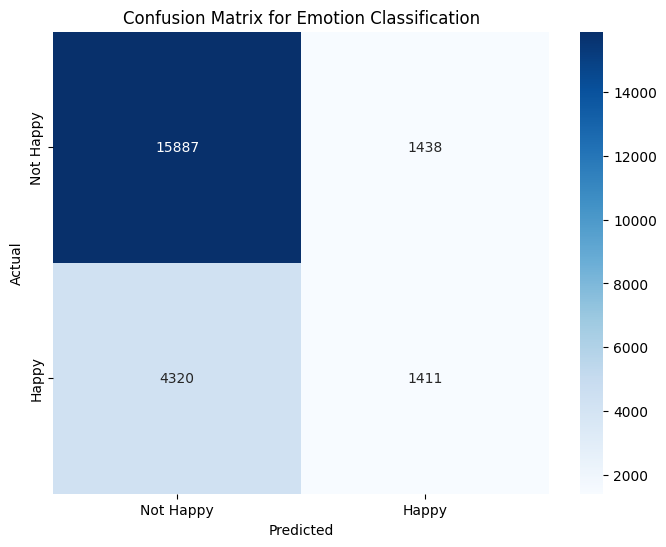

In [ ]:
import seaborn as sns

# Assuming 'cm' is your confusion matrix (from the previous code)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Happy", "Happy"],
            yticklabels=["Not Happy", "Happy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Emotion Classification")
plt.show()

# **Precision and Recall**

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision = precision_score(y_train_happy, y_train_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_train_happy, y_train_pred)
print("Recall:", recall)

Precision: 0.49526149526149527
Recall: 0.24620485081137672


Evaluating Performance for "Not Happy":

Calculations:

Precision for "Not Happy": Precision = TN / (TN + FN) = 15887 / (15887 + 4320) ≈ 0.786

Recall for "Not Happy": Recall = TN / (TN + FP) = 15887 / (15887 + 1438) ≈ 0.917

In [ ]:
# Invert the labels to represent "not happy" as True and "happy" as False
y_train_not_happy = ~y_train_happy

# Invert the predictions as well
y_train_pred_not_happy = ~y_train_pred

# Calculate precision for "not happy"
precision_not_happy = precision_score(y_train_not_happy, y_train_pred_not_happy)
print("Precision for Not Happy:", precision_not_happy)

# Calculate recall for "not happy"
recall_not_happy = recall_score(y_train_not_happy, y_train_pred_not_happy)
print("Recall for Not Happy:", recall_not_happy)

Precision for Not Happy: 0.7862126985698026
Recall for Not Happy: 0.916998556998557


**Precision (0.786):** When the model predicts an image as "not happy," it is correct about **78.6%** of the time. This indicates a good ability to avoid false positives (incorrectly classifying "happy" as "not happy").
**Recall (0.917):** The model correctly identifies about **91.7%** of the actual "not happy" emotions in the data. This indicates a high ability to find the true "not happy" emotions and avoid false negatives (missing "not happy" emotions).

**F1 Score**

In [ ]:
from sklearn.metrics import f1_score

# F1-score for "happy"
f1_happy = f1_score(y_train_happy, y_train_pred)
print("F1-score for Happy:", f1_happy)

# F1-score for "not happy"
f1_not_happy = f1_score(y_train_not_happy, y_train_pred_not_happy)
print("F1-score for Not Happy:", f1_not_happy)

F1-score for Happy: 0.3289044289044289
F1-score for Not Happy: 0.8465842481082809


**Happy: 0.329** - indicates poor performance in identifying "happy" emotions, struggling to balance precision and recall.
**Not Happy: 0.847** - indicates good performance in identifying "not happy" emotions, achieving a better balance between precision and recall.

# **Precision/Recall Trade-off**

Happy

In [ ]:
# Get decision function scores for the test set using cross-validation
y_scores = cross_val_predict(sgd_clf, X_train_sm, y_train_happy, cv=3, method="decision_function")

# Select a threshold (you can experiment with different values)
threshold = 0

# Make predictions based on the threshold
y_train_pred_threshold = (y_scores > threshold)

# Calculate precision and recall for the chosen threshold
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train_happy, y_train_pred_threshold)
recall = recall_score(y_train_happy, y_train_pred_threshold)

print(f"Precision with threshold {threshold}: {precision}")
print(f"Recall with threshold {threshold}: {recall}")

# Now, let's try a different threshold
threshold = 3000  # Experiment with different values
y_train_pred_threshold = (y_scores > threshold)
precision = precision_score(y_train_happy, y_train_pred_threshold)
recall = recall_score(y_train_happy, y_train_pred_threshold)

print(f"Precision with threshold {threshold}: {precision}")
print(f"Recall with threshold {threshold}: {recall}")

Precision with threshold 0: 0.49526149526149527
Recall with threshold 0: 0.24620485081137672
Precision with threshold 3000: 0.5185551707075705
Recall with threshold 3000: 0.18286511952538823


Not happy

In [ ]:
# Calculate precision and recall for "happy" with the chosen threshold
precision_happy = precision_score(y_train_happy, y_train_pred_threshold)
recall_happy = recall_score(y_train_happy, y_train_pred_threshold)

print(f"Precision for Happy with threshold {threshold}: {precision_happy}")
print(f"Recall for Happy with threshold {threshold}: {recall_happy}")

# Calculate precision and recall for "not happy" with the chosen threshold
# Invert predictions and labels for "not happy"
y_train_pred_threshold_not_happy = ~y_train_pred_threshold
precision_not_happy = precision_score(y_train_not_happy, y_train_pred_threshold_not_happy)
recall_not_happy = recall_score(y_train_not_happy, y_train_pred_threshold_not_happy)

print(f"Precision for Not Happy with threshold {threshold}: {precision_not_happy}")
print(f"Recall for Not Happy with threshold {threshold}: {recall_not_happy}")

Precision for Happy with threshold 3000: 0.5185551707075705
Recall for Happy with threshold 3000: 0.18286511952538823
Precision for Not Happy with threshold 3000: 0.7773710482529118
Recall for Not Happy with threshold 3000: 0.9438383838383838


**How do you decide which threshold to use?**

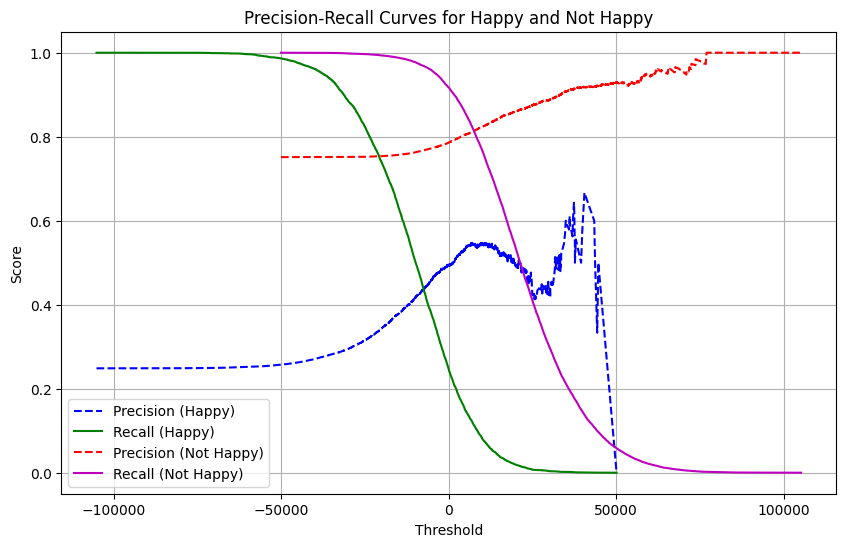

Threshold for Not Happy with precision >= 0.9: 33364.968515819266


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# Get decision function scores using cross-validation
y_scores = cross_val_predict(sgd_clf, X_train_sm, y_train_happy, cv=3, method="decision_function")

# Precision-Recall Curve for "happy"
precisions_happy, recalls_happy, thresholds_happy = precision_recall_curve(y_train_happy, y_scores)

# Precision-Recall Curve for "not happy"
# Invert labels and scores for "not happy"
precisions_not_happy, recalls_not_happy, thresholds_not_happy = precision_recall_curve(
    ~y_train_happy, -y_scores  # Invert scores for "not happy"
)

# Plot both curves
plt.figure(figsize=(10, 6))
plt.plot(thresholds_happy, precisions_happy[:-1], "b--", label="Precision (Happy)")
plt.plot(thresholds_happy, recalls_happy[:-1], "g-", label="Recall (Happy)")
plt.plot(thresholds_not_happy, precisions_not_happy[:-1], "r--", label="Precision (Not Happy)")
plt.plot(thresholds_not_happy, recalls_not_happy[:-1], "m-", label="Recall (Not Happy)")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Curves for Happy and Not Happy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Find thresholds for target precision or recall (example for precision of 0.9)
target_precision = 0.9
#threshold_happy_90 = thresholds_happy[np.argmax(precisions_happy >= target_precision)]
threshold_not_happy_90 = thresholds_not_happy[np.argmax(precisions_not_happy >= target_precision)]

#print(f"Threshold for Happy with precision >= {target_precision}: {threshold_happy_90}")
print(f"Threshold for Not Happy with precision >= {target_precision}: {threshold_not_happy_90}")

# ... (evaluate performance with chosen thresholds for each class) ...

This threshold value (33364.9685...) represents the decision boundary that the model uses to classify an image as "not happy" with a desired precision of at least 0.9.

## **Precision against Recall**

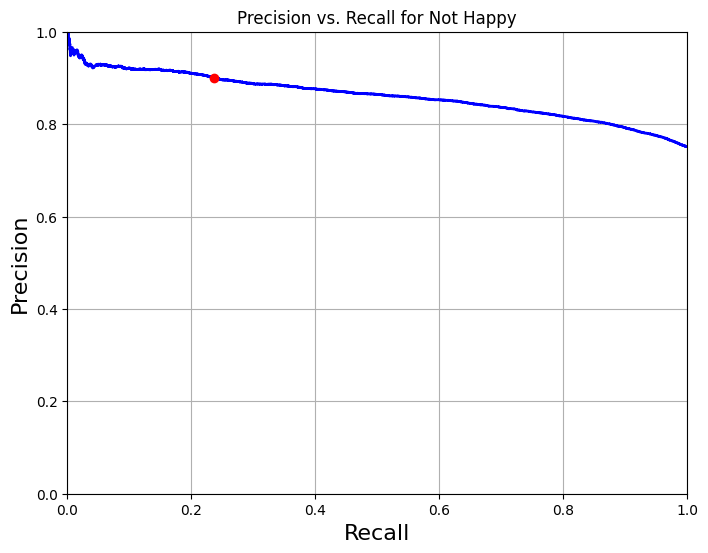

In [ ]:
# Precision-Recall Curve for "not happy"
precisions_not_happy, recalls_not_happy, thresholds_not_happy = precision_recall_curve(
    ~y_train_happy, -y_scores  # Invert labels and scores for "not happy"
)

# Function to plot precision vs. recall
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

# Plot precision vs. recall for "not happy"
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_not_happy, recalls_not_happy)
plt.title("Precision vs. Recall for Not Happy")

# (Optional) Add markers or lines for specific points on the curve
# For example, to highlight the point where precision is 0.9:
target_precision = 0.9
recall_at_target_precision = recalls_not_happy[np.argmax(precisions_not_happy >= target_precision)]
plt.plot([recall_at_target_precision], [target_precision], "ro") # Red dot at target precision

plt.show()

In [ ]:
# Find the lowest threshold for at least 90% precision for "not happy"
target_precision = 0.90
threshold_90_precision_not_happy = thresholds_not_happy[np.argmax(precisions_not_happy >= target_precision)]

print(f"Threshold for Not Happy with precision >= {target_precision}: {threshold_90_precision_not_happy}")

# ... (use this threshold for making predictions for "not happy") ...

Threshold for Not Happy with precision >= 0.9: 33364.968515819266


In [ ]:
# Make predictions for "not happy" using the threshold
y_train_pred_90_not_happy = (y_scores <= threshold_90_precision_not_happy) #use <= for not happy

# Calculate precision for "not happy"
from sklearn.metrics import precision_score
precision_not_happy_90 = precision_score(y_train_not_happy, y_train_pred_90_not_happy)

print(f"Precision for Not Happy with threshold {threshold_90_precision_not_happy:.2f}: {precision_not_happy_90:.2f}")

Precision for Not Happy with threshold 33364.97: 0.75


# **ROC Curves**

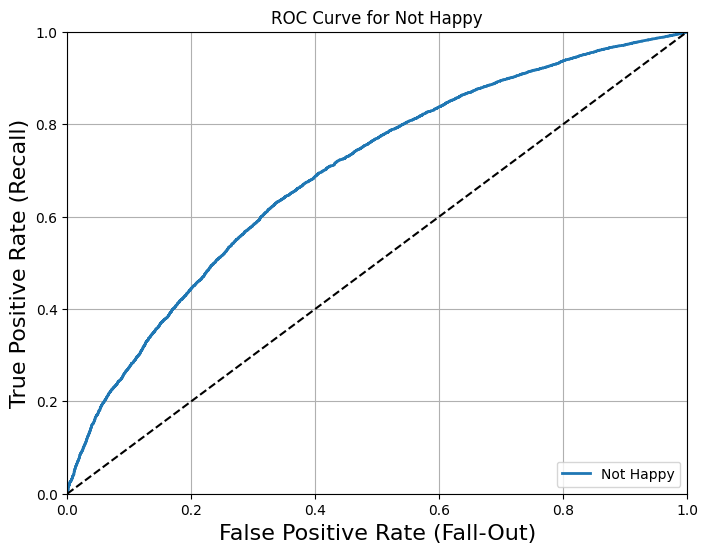

In [ ]:
from sklearn.metrics import roc_curve

# Get decision function scores using cross-validation
y_scores = cross_val_predict(sgd_clf, X_train_sm, y_train_happy, cv=3, method="decision_function")

# ROC Curve for "not happy"
fpr_not_happy, tpr_not_happy, thresholds_not_happy = roc_curve(
    ~y_train_happy, -y_scores  # Invert labels and scores for "not happy"
)

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

# Plot ROC curve for "not happy"
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_not_happy, tpr_not_happy, label="Not Happy")
plt.title("ROC Curve for Not Happy")  # Set title
plt.legend(loc="lower right")  # Add legend
plt.show()

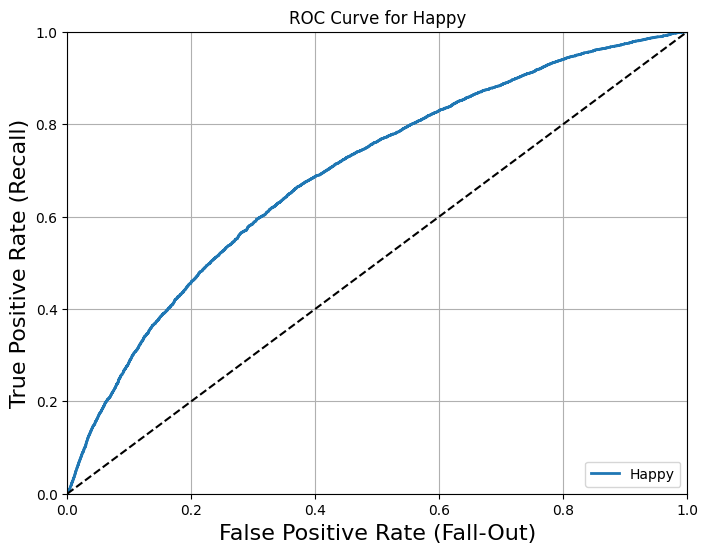

In [ ]:
# ROC Curve for "happy"
fpr_happy, tpr_happy, thresholds_happy = roc_curve(y_train_happy, y_scores)

# ... (plot_roc_curve function remains the same) ...

# Plot ROC curve for "happy"
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_happy, tpr_happy, label="Happy")
plt.title("ROC Curve for Happy")  # Set title
plt.legend(loc="lower right")  # Add legend
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Get decision function scores using cross-validation
y_scores = cross_val_predict(sgd_clf, X_train_sm, y_train_happy, cv=3, method="decision_function")

# ROC AUC score for "happy"
roc_auc_happy = roc_auc_score(y_train_happy, y_scores)
print(f"ROC AUC score for Happy: {roc_auc_happy}")

# ROC AUC score for "not happy"
# Invert labels and scores for "not happy"
roc_auc_not_happy = roc_auc_score(~y_train_happy, -y_scores)
print(f"ROC AUC score for Not Happy: {roc_auc_not_happy}")

ROC AUC score for Happy: 0.6937664956265549
ROC AUC score for Not Happy: 0.6937664956265549


An ROC AUC score of 0.694 suggests that the model has some ability to distinguish between the two classes ("happy" and "not happy") but is not perfect. It performs better than random guessing (AUC of 0.5) but is not as good as a perfect classifier (AUC of 1.0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Calculate F1-scores for SGD Classifier (Happy and Not Happy)
f1_sgd_happy = f1_score(y_train_happy, y_train_pred)
f1_sgd_not_happy = f1_score(y_train_not_happy, y_train_pred_not_happy)
print("SGD Classifier:")
print(f"F1-score for Happy: {f1_sgd_happy:.4f}")
print(f"F1-score for Not Happy: {f1_sgd_not_happy:.4f}")

# Create and train a Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_sm, ~y_train_happy)  # Using inverted labels for "not happy"

# Predictions for "not happy" using Random Forest
y_train_pred_forest_not_happy = cross_val_predict(forest_clf, X_train_sm, ~y_train_happy, cv=3)

# Calculate metrics for Random Forest (Not Happy)
precision_forest_not_happy = precision_score(~y_train_happy, y_train_pred_forest_not_happy)
recall_forest_not_happy = recall_score(~y_train_happy, y_train_pred_forest_not_happy)
f1_forest_not_happy = f1_score(~y_train_happy, y_train_pred_forest_not_happy)

# Print results for Random Forest (Not Happy)
print("\nRandom Forest Classifier (Not Happy):")
print(f"Precision: {precision_forest_not_happy:.4f}")
print(f"Recall: {recall_forest_not_happy:.4f}")
print(f"F1-score: {f1_forest_not_happy:.4f}")

# Compare F1-scores for "not happy"
print(f"\nComparison of F1-scores for Not Happy:")
print(f"SGD Classifier: {f1_sgd_not_happy:.4f}")
print(f"Random Forest Classifier: {f1_forest_not_happy:.4f}")

SGD Classifier:
F1-score for Happy: 0.3289
F1-score for Not Happy: 0.8466

Random Forest Classifier (Not Happy):
Precision: 0.7849
Recall: 0.9871
F1-score: 0.8745

Comparison of F1-scores for Not Happy:
SGD Classifier: 0.8466
Random Forest Classifier: 0.8745


Full Details for Not Happy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Assuming you have the following variables from previous calculations:
# - X_train_sm, y_train_happy (training data)
# - y_train_pred, y_train_not_happy, y_train_pred_not_happy (SGD predictions and labels)
# - y_scores (decision function scores from SGD)

# --- SGD Classifier ---
print("SGD Classifier (Not Happy):")

# Accuracy
accuracy_sgd = accuracy_score(y_train_not_happy, y_train_pred_not_happy)
print(f"Accuracy: {accuracy_sgd:.4f}")

# Precision
precision_sgd = precision_score(y_train_not_happy, y_train_pred_not_happy)
print(f"Precision: {precision_sgd:.4f}")

# Recall
recall_sgd = recall_score(y_train_not_happy, y_train_pred_not_happy)
print(f"Recall: {recall_sgd:.4f}")

# F1-score
f1_sgd = f1_score(y_train_not_happy, y_train_pred_not_happy)
print(f"F1-score: {f1_sgd:.4f}")

# ROC AUC
roc_auc_sgd = roc_auc_score(y_train_not_happy, -y_scores)  # Invert scores for "not happy"
print(f"ROC AUC: {roc_auc_sgd:.4f}")


# --- Random Forest Classifier ---
print("\nRandom Forest Classifier (Not Happy):")

# Create and train a Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_sm, ~y_train_happy)  # Using inverted labels for "not happy"

# Predictions for "not happy" using Random Forest
y_train_pred_forest_not_happy = cross_val_predict(forest_clf, X_train_sm, ~y_train_happy, cv=3)

# Accuracy
accuracy_forest = accuracy_score(~y_train_happy, y_train_pred_forest_not_happy)
print(f"Accuracy: {accuracy_forest:.4f}")

# Precision
precision_forest = precision_score(~y_train_happy, y_train_pred_forest_not_happy)
print(f"Precision: {precision_forest:.4f}")

# Recall
recall_forest = recall_score(~y_train_happy, y_train_pred_forest_not_happy)
print(f"Recall: {recall_forest:.4f}")

# F1-score
f1_forest = f1_score(~y_train_happy, y_train_pred_forest_not_happy)
print(f"F1-score: {f1_forest:.4f}")

# ROC AUC for Random Forest
y_probas_forest = cross_val_predict(forest_clf, X_train_sm, ~y_train_happy, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # Probabilities of the positive class ("not happy")
roc_auc_forest = roc_auc_score(~y_train_happy, y_scores_forest)  # Use probabilities, no need to invert
print(f"ROC AUC: {roc_auc_forest:.4f}")


# --- Comparison ---
print("\nComparison of Metrics for Not Happy:")
print(f"Metric\t\tSGD\t\tRandom Forest")
print(f"--------------------------------------------------")
print(f"Accuracy\t\t{accuracy_sgd:.4f}\t\t{accuracy_forest:.4f}")
print(f"Precision\t\t{precision_sgd:.4f}\t\t{precision_forest:.4f}")
print(f"Recall\t\t{recall_sgd:.4f}\t\t{recall_forest:.4f}")
print(f"F1-score\t\t{f1_sgd:.4f}\t\t{f1_forest:.4f}")
print(f"ROC AUC\t\t{roc_auc_sgd:.4f}\t\t{roc_auc_forest:.4f}")

SGD Classifier (Not Happy):
Accuracy: 0.7503
Precision: 0.7862
Recall: 0.9170
F1-score: 0.8466
ROC AUC: 0.6938

Random Forest Classifier (Not Happy):
Accuracy: 0.7870
Precision: 0.7849
Recall: 0.9871
F1-score: 0.8745
ROC AUC: 0.7924

Comparison of Metrics for Not Happy:
Metric		SGD		Random Forest
--------------------------------------------------
Accuracy		0.7503		0.7870
Precision		0.7862		0.7849
Recall		0.9170		0.9871
F1-score		0.8466		0.8745
ROC AUC		0.6938		0.7924


Now lets see how the model will perform on all of the image classes

# **SGD**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Reshape X_train and X_test to 2D
nsamples, nx, ny = X_train.shape
X_train_2d = X_train.reshape((nsamples, nx * ny))

nsamples, nx, ny = X_test.shape  # Reshape X_test
X_test_2d = X_test.reshape((nsamples, nx * ny))

# --- SGD Classifier ---
print("SGD Classifier - Performance on Testing Data:")

# Create and train SGD Classifier on the full training data
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_2d, y_train)

# Make predictions on the testing data
y_pred_sgd = sgd_clf.predict(X_test_2d)  # Use X_test_2d for predictions

# Calculate evaluation metrics (using y_test and y_pred_sgd)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd, average='weighted')
recall_sgd = recall_score(y_test, y_pred_sgd, average='weighted')
f1_sgd = f1_score(y_test, y_pred_sgd, average='weighted')
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Print the metrics
print(f"Accuracy: {accuracy_sgd:.4f}")
print(f"Precision: {precision_sgd:.4f}")
print(f"Recall: {recall_sgd:.4f}")
print(f"F1-score: {f1_sgd:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_sgd)

SGD Classifier - Performance on Testing Data:
Accuracy: 0.2141
Precision: 0.2966
Recall: 0.2141
F1-score: 0.1696

Confusion Matrix:
[[  4   0 606 110  56   5  18]
 [  0   0  68  13   5   0   1]
 [  3   2 679  64  46   0  27]
 [  5   0 980 335  81   1  31]
 [  1   0 779  89 103   2  22]
 [  5   0 772 103  75   2  31]
 [  0   0 481  30  19   0 111]]


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have:
# - X_train, y_train (full training data)
# - X_test, y_test (testing data) - Obtained from train_test_split

# Reshape X_train and X_test to 2D
nsamples, nx, ny = X_train.shape
X_train_2d = X_train.reshape((nsamples, nx * ny))

nsamples, nx, ny = X_test.shape
X_test_2d = X_test.reshape((nsamples, nx * ny))

# --- Random Forest Classifier ---
print("Random Forest Classifier - Performance on Testing Data:")

# Create and train Random Forest on the full training data
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_2d, y_train)

# Make predictions on the testing data
y_pred_forest = forest_clf.predict(X_test_2d)  # Use X_test_2d for predictions

# Calculate evaluation metrics (using y_test and y_pred_forest)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Print the metrics
print(f"Accuracy: {accuracy_forest:.4f}")
print(f"Precision: {precision_forest:.4f}")
print(f"Recall: {recall_forest:.4f}")
print(f"F1-score: {f1_forest:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_forest)

Random Forest Classifier - Performance on Testing Data:
Accuracy: 0.4392
Precision: 0.4458
Recall: 0.4392
F1-score: 0.4188

Confusion Matrix:
[[ 158    0   66  282  121  136   36]
 [   8   11    4   35   13    9    7]
 [  61    1  195  264   96  152   52]
 [  27    0   49 1067  106  140   44]
 [  33    0   62  332  391  148   30]
 [  57    0   58  324  164  364   21]
 [  24    0   57  125   46   43  346]]
